In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Solow-Swan model

This is the basic model with constant labor inputs and discrete time.

In [165]:
s = 0.3
δ = 0.1
k_0 = 4
k_max = 10

def production_function(k):
    return k ** 0.5

def capital_accumulation_equation(s, δ, k):
    return s * production_function(k) + (1 - δ) * k

k_star = (s / δ) ** 2
k_t = np.arange(10)

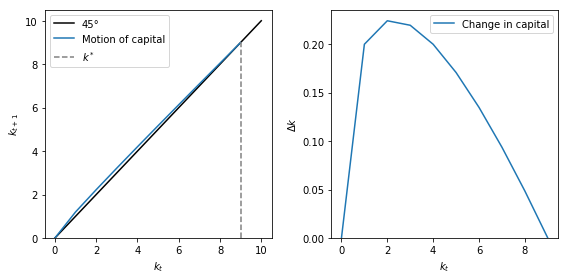

In [166]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot((0, k_max), (0, k_max), label="45°", c="black")
ax1.plot(k_t, capital_accumulation_equation(s, δ, k_t), label="Motion of capital")
ax1.plot((k_star,) * 2, (0, k_star), label="$k^*$", c="grey", ls="--")
ax1.set_ylim(0)
ax1.set_xlabel("$k_t$")
ax1.set_ylabel("$k_{t+1}$")
ax1.legend()

ax2.plot(k_t, capital_accumulation_equation(s, δ, k_t) - k_t, label="Change in capital")
ax2.set_xlabel("$k_t$")
ax2.set_ylabel("$\Delta k$")
ax2.set_ylim(0)
ax2.legend()

plt.tight_layout()
plt.show()
plt.close()

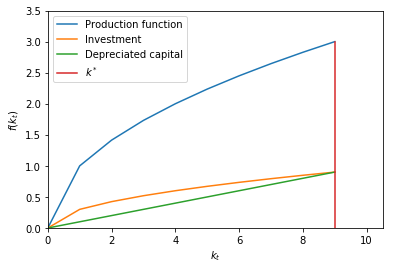

In [167]:
fig, ax = plt.subplots()

ax.plot(k_t, production_function(k_t), label="Production function")
ax.plot(k_t, s * production_function(k_t), label="Investment")
ax.plot(k_t, δ * k_t, label="Depreciated capital")
ax.plot((k_star,) * 2, (0, production_function(k_star)), label="$k^*$")

ax.set_xlim(0, 10.5)
ax.set_ylim(0, 3.5)

ax.set_xlabel("$k_t$")
ax.set_ylabel("$f(k_t)$")

ax.legend()

plt.show()
plt.close()

### Extension 1: continuous time

We extend the model by implementing continuous time. We define

$$
    \dot{x}_t = \frac{d x_t}{dt}
$$

which is equivalent to the normal model when time is in units of one. The capital accumulation function changes to

$$
    \dot{K} = s F[K_t, L_t] - \delta K_t
$$

and in per capita form

$$\begin{align}
    \dot{k} &= \frac{\dot{K}}{L_t}\\
            &= sf[k_t] - \delta k_t
\end{align}$$

The steady state requires $\dot K = \dot k = 0$ which leads to

$$
    \frac{f(k^*)}{k^*} = \frac{\delta}{s}
$$

### Extension 2: population growth

Up to this point, we have assumed that the number of people working in the economy stays the same. Now, the population is growing with

$$
    L_t = L_0 e^{nt}
$$

so that the growth rate is $\frac{\dot{L}_t}{L} = n$. Thus, we have a new capital accumulation function per capita.

$$\begin{align}
    \dot{k}_t &= \frac{d\frac{K_t}{L_t}}{d t}\\
              &= \frac{\dot{K_t} L_t - K_t \dot{L_t}}{L_t^2}\\
              &= \frac{\dot K_t}{L_t} - \frac{K_t}{L_t}\frac{\dot{L_t}}{L_t}\\
              &= \frac{s F[K_t, L_t] - \delta K_t}{L_t} - n k_t\\
              &= s f(k_t) - (\delta + n) k_t
\end{align}$$

### Extension 3: technological growth

Now, we add technological growth which enters the production function by improving the effectiveness of labor. This is also called Harrod-neutral progress or labor-augment technology.

$$
    Y_t = F(K_t, A_t L_t)
$$

Technological growth suffice $A_t = A_0 e^{\theta t}$ so that the growth rate is $\frac{\dot{A}_t}{A_t} = \theta$.

To simplify the model, all terms will be expressed in per capita effective labor terms. The capital accumulation function changes to

$$\begin{align}
    \dot{k}_t &= \frac{d\frac{K_t}{L_t A_t}}{d t}\\
              &= \frac{\dot{K_t} L_t A_t - K_t (\dot{L_t} A_t + L_t \dot{A}_t)}{L_t^2 A_t^2}\\
              &= \frac{\dot K_t}{L_t A_t} - \frac{K_t}{L_t A_t}\frac{\dot{L_t}}{L_t} - \frac{K_t}{L_t A_t} \frac{\dot{A}_t}{A_t}\\
              &= \frac{s F[K_t, L_t A_t] - \delta K_t}{L_t A_t} - n k_t - \theta k_t\\
              &= s f(k_t) - (\delta + n + \theta) k_t
\end{align}$$